In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
digits = load_digits()

In [5]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


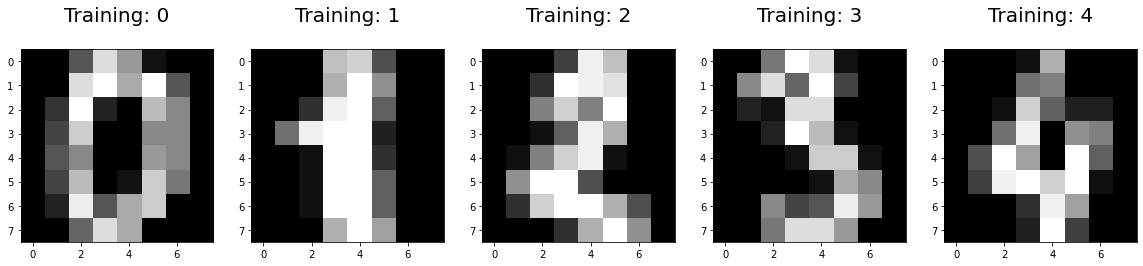

In [7]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5, index +1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label,fontsize=20)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.23,random_state=2)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1383, 64)
(1383,)
(414, 64)
(414,)


In [14]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [16]:
lgr.fit(x_train,y_train)

C:\Users\pritb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
print(lgr.predict(x_test[0].reshape(1,-1)))

[4]


In [20]:
predictions = lgr.predict(x_test)

In [22]:
score = lgr.score(x_test,y_test)
print(score)

0.9516908212560387


In [23]:
from sklearn import metrics
confusion_metrix = metrics.confusion_matrix(y_test,predictions)
print(confusion_metrix)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score : 0.9516908212560387')

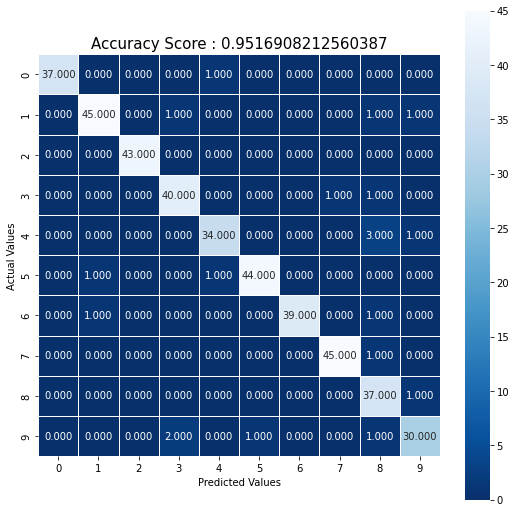

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_metrix,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
title = 'Accuracy Score : {0}'.format(score)
plt.title(title,size=15)

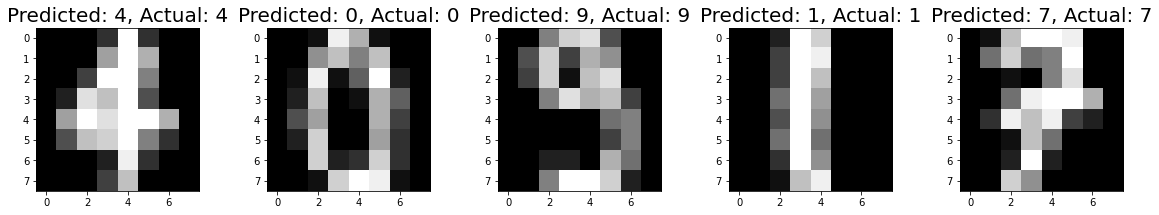

In [28]:
index = 0
clasifiedindex = []
for predict,actual in zip(predictions,y_test):
    if predict == actual:
        clasifiedindex.append(index)
    index += 1
plt.figure(figsize=(20,3))

for plotIndex,wrong in enumerate(clasifiedindex[0:5]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong],y_test[wrong]),fontsize = 20)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [30]:
score = lgr.score(x_test,y_test)
print(score)
ac_score = accuracy_score(y_test,predictions)
print(ac_score)

0.9516908212560387
0.9516908212560387


In [34]:
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.96      0.94      0.95        48
           2       1.00      1.00      1.00        43
           3       0.93      0.95      0.94        42
           4       0.94      0.89      0.92        38
           5       0.98      0.96      0.97        46
           6       1.00      0.95      0.97        41
           7       0.98      0.98      0.98        46
           8       0.82      0.97      0.89        38
           9       0.91      0.88      0.90        34

    accuracy                           0.95       414
   macro avg       0.95      0.95      0.95       414
weighted avg       0.95      0.95      0.95       414

